In [1]:
# importando bibliotecas
import pandas as pd

In [2]:
#carregando os dados
data = pd.read_csv('./data/bank-full.csv', sep=';')

### Análise Exploratória

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Feature Engineering

#### Criando variável com o nível de conhecimento em tecnologia necessário para cada cargo, supondo que essa seja um dado necessário para a área de negócio, mas não havia essa informação no dataset.

In [5]:
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [6]:
data["technology use"] = data['job'].map(lambda x: "alto" if "student" in x 
                                         else "alto" if "technician" in x 
                                         else "alto" if "entrepreneur" in x 
                                         else "medio" if "admin" in x
                                         else "medio" if "management" in x
                                         else "medio" if "services" in x
                                         else "baixo")

In [7]:
data['technology use'].value_counts()

medio    18783
baixo    16406
alto     10022
Name: technology use, dtype: int64

In [8]:
data['technology use'].isna().sum()

0

#### Algoritmos de Machine Learning esperam receber valores numéricos para realizar os cálculos de previsões, mesmo que as variáveis signifiquem dados categóricos. Por esta razão, farei a transformação de algumas variáveis, utilizando diferentes técnicas.

Alterando a variável technology_use, utilizando *One-Hot-Encoding*, técnica que utiliza vetores para representar número de possibilidades para uma variável categórica. 

In [13]:
one_hot = pd.get_dummies(data['technology use'])
data = data.join(one_hot)

In [15]:
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,technology use,defaulted,alto,baixo,medio
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,medio,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,alto,0,1,0,0


Criando variável *dummie*: nova coluna (defaulted) com informação numérica referente à informação categórica da coluna default.

In [10]:
data["defaulted"] = data['default'].map(lambda x: "1" if "yes" in x 
                                         else "0")

In [12]:
data["defaulted"].value_counts()

0    44396
1      815
Name: defaulted, dtype: int64

As variáveis originais foram mantidas pois podem ser necessárias para alguma comparação ou utilização em algum cálculo ou modificação futura.

__Também é possível visualizar informações para criar novas colunas combinando duas ou mais variáveis, sem utilizar cálculo, apenas agrupando.__

In [18]:
 data.groupby(['job', 'marital']).size()

job            marital 
admin.         divorced     750
               married     2693
               single      1728
blue-collar    divorced     750
               married     6968
               single      2014
entrepreneur   divorced     179
               married     1070
               single       238
housemaid      divorced     184
               married      912
               single       144
management     divorced    1111
               married     5400
               single      2947
retired        divorced     425
               married     1731
               single       108
self-employed  divorced     140
               married      993
               single       446
services       divorced     549
               married     2407
               single      1198
student        divorced       6
               married       54
               single       878
technician     divorced     925
               married     4052
               single      2620
unemployed     d

Não é uma visualização agradável, então vou plotar um gráfico.

<AxesSubplot:xlabel='job'>

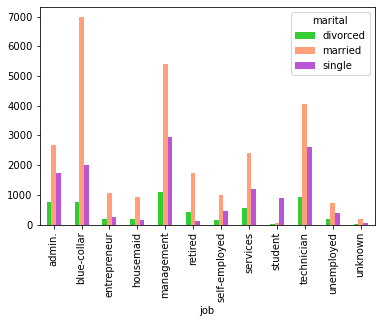

In [33]:
data.groupby('marital').job.value_counts().unstack(0).plot.bar(
                                                        color={'divorced':'limegreen', 'married':'lightsalmon', 'single':'mediumorchid'}
)